In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import pylab as plt
import seaborn as sns

%matplotlib inline


In [3]:
df_muestra = pd.read_csv('muestra.csv')


In [4]:
df_muestra.head()


,id,Price
0,0,2759145
1,1,10926785
2,2,20212944
3,3,46541311
4,4,46335226


In [5]:
df_test = pd.read_csv('test.csv')


In [6]:
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg


In [7]:
df_train = pd.read_csv('train.csv')

In [8]:
df_train.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [9]:
nulos = df_test.isnull().sum()
nulos


Manufacturer                 0
Model Name                   0
Category                     0
Screen Size                  0
Screen                       0
CPU                          0
RAM                          0
 Storage                     0
GPU                          0
Operating System             0
Operating System Version    34
Weight                       0
dtype: int64

In [10]:
nulostrain = df_train.isnull().sum()
nulostrain

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
 Storage                      0
GPU                           0
Operating System              0
Operating System Version    136
Weight                        0
Price                         0
dtype: int64

In [11]:
df_train["Operating System Version"].fillna("unknown", inplace=True)
df_train.head()

df_test["Operating System Version"].fillna("unknown", inplace=True)

In [12]:
df_train["Operating System Version"].fillna("unknown", inplace=True)

In [13]:
df_test["Operating System Version"].fillna("unknown", inplace=True)
pd.set_option('display.max_rows', None)

df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg


In [14]:
manufacturer_counts = df_test["Manufacturer"].value_counts()

In [15]:
manufacturer_counts = df_train["Manufacturer"].value_counts()
manufacturer_counts

Dell         232
Lenovo       226
HP           179
Asus         122
Acer          83
Toshiba       39
MSI           34
Apple         17
Samsung        8
Mediacom       7
Microsoft      6
Razer          5
Xiaomi         4
Chuwi          3
Google         3
LG             3
Huawei         2
Vero           2
Fujitsu        2
Name: Manufacturer, dtype: int64

In [16]:
df_test_encoded = pd.get_dummies(df_test, columns=["Category"])

# Muestra el nuevo dataframe con las variables numéricas codificadas
print(df_test_encoded.head())

  Manufacturer                         Model Name Screen Size  \
0           HP  15-bs053od (i7-7500U/6GB/1TB/W10)       15.6"   
1         Asus                   Rog GL753VE-DS74       17.3"   
2         Dell                      Inspiron 7579       15.6"   
3      Toshiba                  Portege Z30-C-1CV       13.3"   
4       Lenovo                  IdeaPad 320-15ABR       15.6"   

                                      Screen                          CPU  \
0                                   1366x768   Intel Core i7 7500U 2.7GHz   
1                          Full HD 1920x1080  Intel Core i7 7700HQ 2.8GHz   
2  IPS Panel Full HD / Touchscreen 1920x1080   Intel Core i7 7500U 2.7GHz   
3                          Full HD 1920x1080   Intel Core i5 6200U 2.3GHz   
4                          Full HD 1920x1080  AMD A12-Series 9720P 3.6GHz   

    RAM               Storage                         GPU Operating System  \
0   6GB               1TB HDD       Intel HD Graphics 620          W

In [17]:
df_train_encoded = pd.get_dummies(df_train, columns=["Category"])

# Muestra el nuevo dataframe con las variables numéricas codificadas
print(df_train_encoded.head())

  Manufacturer   Model Name Screen Size                              Screen  \
0        Apple  MacBook Pro       13.3"  IPS Panel Retina Display 2560x1600   
1        Apple  Macbook Air       13.3"                            1440x900   
2           HP       250 G6       15.6"                   Full HD 1920x1080   
3        Apple  MacBook Pro       15.4"  IPS Panel Retina Display 2880x1800   
4        Apple  MacBook Pro       13.3"  IPS Panel Retina Display 2560x1600   

                          CPU   RAM              Storage  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            GPU Operating System Operating System Version  \
0  Intel Iris Plus Graphics 640            macOS                  unknown   
1        I

In [18]:
# Eliminar las comillas de la columna "Screen Size"
df_test_encoded["Screen Size"] = df_test_encoded["Screen Size"].str.replace('"', '')

# Muestra el dataframe con las comillas eliminadas en la columna "Screen Size"
df_test_encoded.head()

,Manufacturer,Model Name,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),15.6,1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,0,0,0,1,0,0
1,Asus,Rog GL753VE-DS74,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,0,1,0,0,0,0
2,Dell,Inspiron 7579,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,1,0,0,0,0,0
3,Toshiba,Portege Z30-C-1CV,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg,0,0,0,1,0,0
4,Lenovo,IdeaPad 320-15ABR,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,0,0,0,1,0,0


In [19]:

# Eliminar las comillas de la columna "Screen Size"
df_train_encoded["Screen Size"] = df_train_encoded["Screen Size"].str.replace('"', '')

# Muestra el dataframe con las comillas eliminadas en la columna "Screen Size"
df_train_encoded.head()

,Manufacturer,Model Name,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,unknown,1.37kg,11912523.48,0,0,0,0,1,0
1,Apple,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,unknown,1.34kg,7993374.48,0,0,0,0,1,0
2,HP,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,unknown,1.86kg,5112900.00,0,0,0,1,0,0
3,Apple,MacBook Pro,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,unknown,1.83kg,22563005.40,0,0,0,0,1,0
4,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,unknown,1.37kg,16037611.20,0,0,0,0,1,0


In [20]:
df_test_encoded["Screen Size"] = df_test_encoded["Screen Size"].astype(float)

In [21]:
df_train_encoded["Screen Size"] = df_train_encoded["Screen Size"].astype(float)

In [22]:
# Eliminar GB de la columna RAM
df_test_encoded["RAM"] = df_test_encoded["RAM"].str.replace('GB', '')

# Muestra el dataframe con las comillas eliminadas en la columna "Screen Size"
df_test_encoded.head()

,Manufacturer,Model Name,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),15.6,1366x768,Intel Core i7 7500U 2.7GHz,6,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,0,0,0,1,0,0
1,Asus,Rog GL753VE-DS74,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,0,1,0,0,0,0
2,Dell,Inspiron 7579,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,1,0,0,0,0,0
3,Toshiba,Portege Z30-C-1CV,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg,0,0,0,1,0,0
4,Lenovo,IdeaPad 320-15ABR,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,0,0,0,1,0,0


In [23]:
# Eliminar GB de la columna RAM
df_train_encoded["RAM"] = df_train_encoded["RAM"].str.replace('GB', '')

# Muestra el dataframe con las comillas eliminadas en la columna "Screen Size"
df_train_encoded.head()

,Manufacturer,Model Name,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,unknown,1.37kg,11912523.48,0,0,0,0,1,0
1,Apple,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,unknown,1.34kg,7993374.48,0,0,0,0,1,0
2,HP,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,unknown,1.86kg,5112900.00,0,0,0,1,0,0
3,Apple,MacBook Pro,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,unknown,1.83kg,22563005.40,0,0,0,0,1,0
4,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,unknown,1.37kg,16037611.20,0,0,0,0,1,0


In [24]:
df_test_encoded.head()

,Manufacturer,Model Name,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),15.6,1366x768,Intel Core i7 7500U 2.7GHz,6,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,0,0,0,1,0,0
1,Asus,Rog GL753VE-DS74,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,0,1,0,0,0,0
2,Dell,Inspiron 7579,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,1,0,0,0,0,0
3,Toshiba,Portege Z30-C-1CV,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg,0,0,0,1,0,0
4,Lenovo,IdeaPad 320-15ABR,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,0,0,0,1,0,0


In [25]:
df_train_encoded.head()

,Manufacturer,Model Name,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,unknown,1.37kg,11912523.48,0,0,0,0,1,0
1,Apple,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,unknown,1.34kg,7993374.48,0,0,0,0,1,0
2,HP,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,unknown,1.86kg,5112900.00,0,0,0,1,0,0
3,Apple,MacBook Pro,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,unknown,1.83kg,22563005.40,0,0,0,0,1,0
4,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,unknown,1.37kg,16037611.20,0,0,0,0,1,0


In [26]:
df_test_encoded["RAM"] = df_test_encoded["RAM"].astype(int)

In [27]:
df_train_encoded["RAM"] = df_train_encoded["RAM"].astype(int)

In [28]:
import re

# Eliminar las letras de la columna "Storage"
df_test_encoded[' Storage'] = df_test_encoded[' Storage'].apply(lambda x: re.sub('[^0-9]', '', str(x)))

# Muestra el dataframe con las letras eliminadas en la columna "Storage"
df_test_encoded.head()

,Manufacturer,Model Name,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),15.6,1366x768,Intel Core i7 7500U 2.7GHz,6,1,Intel HD Graphics 620,Windows,10,2.04kg,0,0,0,1,0,0
1,Asus,Rog GL753VE-DS74,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,2561,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,0,1,0,0,0,0
2,Dell,Inspiron 7579,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,512,Intel HD Graphics 620,Windows,10,2.19kg,1,0,0,0,0,0
3,Toshiba,Portege Z30-C-1CV,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,128,Intel HD Graphics 520,Windows,7,1.2kg,0,0,0,1,0,0
4,Lenovo,IdeaPad 320-15ABR,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6,256,AMD Radeon 530,Windows,10,2.2kg,0,0,0,1,0,0


In [29]:
import re

# Eliminar las letras de la columna "Storage"
df_train_encoded[' Storage'] = df_train_encoded[' Storage'].apply(lambda x: re.sub('[^0-9]', '', str(x)))

# Muestra el dataframe con las letras eliminadas en la columna "Storage"
df_train_encoded.head()


,Manufacturer,Model Name,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,unknown,1.37kg,11912523.48,0,0,0,0,1,0
1,Apple,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,unknown,1.34kg,7993374.48,0,0,0,0,1,0
2,HP,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,unknown,1.86kg,5112900.00,0,0,0,1,0,0
3,Apple,MacBook Pro,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,unknown,1.83kg,22563005.40,0,0,0,0,1,0
4,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,unknown,1.37kg,16037611.20,0,0,0,0,1,0


In [30]:
df_test_encoded[" Storage"] = df_test_encoded[" Storage"].astype(int)

In [31]:
df_train_encoded[" Storage"] = df_train_encoded[" Storage"].astype(int)

In [32]:
df_test_encoded["Weight"] = df_test_encoded["Weight"].str.replace('kg', '')
df_test_encoded.head()

,Manufacturer,Model Name,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),15.6,1366x768,Intel Core i7 7500U 2.7GHz,6,1,Intel HD Graphics 620,Windows,10,2.04,0,0,0,1,0,0
1,Asus,Rog GL753VE-DS74,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,2561,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,0,1,0,0,0,0
2,Dell,Inspiron 7579,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,512,Intel HD Graphics 620,Windows,10,2.19,1,0,0,0,0,0
3,Toshiba,Portege Z30-C-1CV,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,128,Intel HD Graphics 520,Windows,7,1.2,0,0,0,1,0,0
4,Lenovo,IdeaPad 320-15ABR,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6,256,AMD Radeon 530,Windows,10,2.2,0,0,0,1,0,0


In [33]:
df_train_encoded["Weight"] = df_train_encoded["Weight"].str.replace('kg', '')
df_train_encoded.head()

,Manufacturer,Model Name,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,unknown,1.37,11912523.48,0,0,0,0,1,0
1,Apple,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,unknown,1.34,7993374.48,0,0,0,0,1,0
2,HP,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,unknown,1.86,5112900.00,0,0,0,1,0,0
3,Apple,MacBook Pro,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,unknown,1.83,22563005.40,0,0,0,0,1,0
4,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,unknown,1.37,16037611.20,0,0,0,0,1,0


In [34]:
# Reemplazar '4s' por 2 en la columna 'Weight'
df_test_encoded['Weight'] = df_test_encoded['Weight'].replace('4s', 2)




In [35]:
df_test_encoded["Weight"] = df_test_encoded["Weight"].astype(float)
df_test_encoded.head()

,Manufacturer,Model Name,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),15.6,1366x768,Intel Core i7 7500U 2.7GHz,6,1,Intel HD Graphics 620,Windows,10,2.04,0,0,0,1,0,0
1,Asus,Rog GL753VE-DS74,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,2561,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,0,1,0,0,0,0
2,Dell,Inspiron 7579,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,512,Intel HD Graphics 620,Windows,10,2.19,1,0,0,0,0,0
3,Toshiba,Portege Z30-C-1CV,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,128,Intel HD Graphics 520,Windows,7,1.20,0,0,0,1,0,0
4,Lenovo,IdeaPad 320-15ABR,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6,256,AMD Radeon 530,Windows,10,2.20,0,0,0,1,0,0


In [36]:
df_train_encoded["Weight"] = df_train_encoded["Weight"].astype(float)
df_train_encoded.head()

,Manufacturer,Model Name,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,unknown,1.37,11912523.48,0,0,0,0,1,0
1,Apple,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,unknown,1.34,7993374.48,0,0,0,0,1,0
2,HP,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,unknown,1.86,5112900.00,0,0,0,1,0,0
3,Apple,MacBook Pro,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,unknown,1.83,22563005.40,0,0,0,0,1,0
4,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,unknown,1.37,16037611.20,0,0,0,0,1,0


In [37]:
df_test_encoded = df_test_encoded.drop(columns=["Screen"])

df_test_encoded.head()

,Manufacturer,Model Name,Screen Size,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),15.6,Intel Core i7 7500U 2.7GHz,6,1,Intel HD Graphics 620,Windows,10,2.04,0,0,0,1,0,0
1,Asus,Rog GL753VE-DS74,17.3,Intel Core i7 7700HQ 2.8GHz,16,2561,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,0,1,0,0,0,0
2,Dell,Inspiron 7579,15.6,Intel Core i7 7500U 2.7GHz,12,512,Intel HD Graphics 620,Windows,10,2.19,1,0,0,0,0,0
3,Toshiba,Portege Z30-C-1CV,13.3,Intel Core i5 6200U 2.3GHz,4,128,Intel HD Graphics 520,Windows,7,1.20,0,0,0,1,0,0
4,Lenovo,IdeaPad 320-15ABR,15.6,AMD A12-Series 9720P 3.6GHz,6,256,AMD Radeon 530,Windows,10,2.20,0,0,0,1,0,0


In [38]:

df_train_encoded = df_train_encoded.drop(columns=["Screen"])

df_train_encoded.head()

,Manufacturer,Model Name,Screen Size,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,Apple,MacBook Pro,13.3,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,unknown,1.37,11912523.48,0,0,0,0,1,0
1,Apple,Macbook Air,13.3,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,unknown,1.34,7993374.48,0,0,0,0,1,0
2,HP,250 G6,15.6,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,unknown,1.86,5112900.00,0,0,0,1,0,0
3,Apple,MacBook Pro,15.4,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,unknown,1.83,22563005.40,0,0,0,0,1,0
4,Apple,MacBook Pro,13.3,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,unknown,1.37,16037611.20,0,0,0,0,1,0


In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_test_encoded["Model Name"] = le.fit_transform(df_test_encoded["Model Name"])

In [40]:
df_test_encoded.head()

,Manufacturer,Model Name,Screen Size,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,HP,5,15.6,Intel Core i7 7500U 2.7GHz,6,1,Intel HD Graphics 620,Windows,10,2.04,0,0,0,1,0,0
1,Asus,138,17.3,Intel Core i7 7700HQ 2.8GHz,16,2561,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,0,1,0,0,0,0
2,Dell,89,15.6,Intel Core i7 7500U 2.7GHz,12,512,Intel HD Graphics 620,Windows,10,2.19,1,0,0,0,0,0
3,Toshiba,112,13.3,Intel Core i5 6200U 2.3GHz,4,128,Intel HD Graphics 520,Windows,7,1.20,0,0,0,1,0,0
4,Lenovo,70,15.6,AMD A12-Series 9720P 3.6GHz,6,256,AMD Radeon 530,Windows,10,2.20,0,0,0,1,0,0


In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_train_encoded["Model Name"] = le.fit_transform(df_train_encoded["Model Name"])


In [42]:
df_train_encoded.head()

,Manufacturer,Model Name,Screen Size,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,Apple,236,13.3,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,unknown,1.37,11912523.48,0,0,0,0,1,0
1,Apple,237,13.3,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,unknown,1.34,7993374.48,0,0,0,0,1,0
2,HP,38,15.6,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,unknown,1.86,5112900.00,0,0,0,1,0,0
3,Apple,236,15.4,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,unknown,1.83,22563005.40,0,0,0,0,1,0
4,Apple,236,13.3,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,unknown,1.37,16037611.20,0,0,0,0,1,0


In [43]:
le = LabelEncoder()
df_test_encoded["Manufacturer"] = le.fit_transform(df_test_encoded["Manufacturer"])


In [44]:
df_test_encoded.head()

,Manufacturer,Model Name,Screen Size,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,5,5,15.6,Intel Core i7 7500U 2.7GHz,6,1,Intel HD Graphics 620,Windows,10,2.04,0,0,0,1,0,0
1,2,138,17.3,Intel Core i7 7700HQ 2.8GHz,16,2561,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,0,1,0,0,0,0
2,3,89,15.6,Intel Core i7 7500U 2.7GHz,12,512,Intel HD Graphics 620,Windows,10,2.19,1,0,0,0,0,0
3,10,112,13.3,Intel Core i5 6200U 2.3GHz,4,128,Intel HD Graphics 520,Windows,7,1.20,0,0,0,1,0,0
4,6,70,15.6,AMD A12-Series 9720P 3.6GHz,6,256,AMD Radeon 530,Windows,10,2.20,0,0,0,1,0,0


In [45]:


le = LabelEncoder()
df_train_encoded["Manufacturer"] = le.fit_transform(df_train_encoded["Manufacturer"])


In [46]:
df_train_encoded.head()

,Manufacturer,Model Name,Screen Size,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,1,236,13.3,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,unknown,1.37,11912523.48,0,0,0,0,1,0
1,1,237,13.3,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,unknown,1.34,7993374.48,0,0,0,0,1,0
2,7,38,15.6,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,unknown,1.86,5112900.00,0,0,0,1,0,0
3,1,236,15.4,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,unknown,1.83,22563005.40,0,0,0,0,1,0
4,1,236,13.3,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,unknown,1.37,16037611.20,0,0,0,0,1,0


In [47]:
df_test_encoded = df_test_encoded.drop(columns=["CPU" , 'GPU'])

df_test_encoded.head()

,Manufacturer,Model Name,Screen Size,RAM,Storage,Operating System,Operating System Version,Weight,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,5,5,15.6,6,1,Windows,10,2.04,0,0,0,1,0,0
1,2,138,17.3,16,2561,Windows,10,2.99,0,1,0,0,0,0
2,3,89,15.6,12,512,Windows,10,2.19,1,0,0,0,0,0
3,10,112,13.3,4,128,Windows,7,1.20,0,0,0,1,0,0
4,6,70,15.6,6,256,Windows,10,2.20,0,0,0,1,0,0


In [48]:
df_train_encoded = df_train_encoded.drop(columns=["CPU" , 'GPU'])

df_train_encoded.head()

,Manufacturer,Model Name,Screen Size,RAM,Storage,Operating System,Operating System Version,Weight,Price,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,1,236,13.3,8,128,macOS,unknown,1.37,11912523.48,0,0,0,0,1,0
1,1,237,13.3,8,128,macOS,unknown,1.34,7993374.48,0,0,0,0,1,0
2,7,38,15.6,8,256,No OS,unknown,1.86,5112900.00,0,0,0,1,0,0
3,1,236,15.4,16,512,macOS,unknown,1.83,22563005.40,0,0,0,0,1,0
4,1,236,13.3,8,256,macOS,unknown,1.37,16037611.20,0,0,0,0,1,0


In [49]:
Operating_System = df_train["Operating System"].value_counts()
Operating_System

Windows      837
No OS         52
Linux         48
Chrome OS     22
macOS         13
Mac OS         4
Android        1
Name: Operating System, dtype: int64

In [50]:
Operating_System = df_test["Operating System"].value_counts()
Operating_System

Windows      287
No OS         14
Linux         14
Chrome OS      5
Mac OS         4
Android        1
Name: Operating System, dtype: int64

In [51]:
df_test_encoded = df_test_encoded.drop(columns=['Operating System Version'])

df_test_encoded.head()

,Manufacturer,Model Name,Screen Size,RAM,Storage,Operating System,Weight,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,5,5,15.6,6,1,Windows,2.04,0,0,0,1,0,0
1,2,138,17.3,16,2561,Windows,2.99,0,1,0,0,0,0
2,3,89,15.6,12,512,Windows,2.19,1,0,0,0,0,0
3,10,112,13.3,4,128,Windows,1.20,0,0,0,1,0,0
4,6,70,15.6,6,256,Windows,2.20,0,0,0,1,0,0


In [52]:
df_train_encoded = df_train_encoded.drop(columns=['Operating System Version'])

df_train_encoded.head()

,Manufacturer,Model Name,Screen Size,RAM,Storage,Operating System,Weight,Price,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,1,236,13.3,8,128,macOS,1.37,11912523.48,0,0,0,0,1,0
1,1,237,13.3,8,128,macOS,1.34,7993374.48,0,0,0,0,1,0
2,7,38,15.6,8,256,No OS,1.86,5112900.00,0,0,0,1,0,0
3,1,236,15.4,16,512,macOS,1.83,22563005.40,0,0,0,0,1,0
4,1,236,13.3,8,256,macOS,1.37,16037611.20,0,0,0,0,1,0


In [53]:
# Renombrar los valores en la columna 'Operating System'
df_test_encoded['Operating System'] = df_test_encoded['Operating System'].replace(['Mac OS', 'macOS', 'Chrome OS'], 'Mac_Os')

In [54]:
# Renombrar los valores en la columna 'Operating System'
df_train_encoded['Operating System'] = df_train_encoded['Operating System'].replace(['Mac OS', 'macOS', 'Chrome OS'], 'Mac_Os')


In [55]:
# Renombrar los valores en la columna 'Operating System'
df_test_encoded['Operating System'] = df_test_encoded['Operating System'].replace(['No OS', 'Linux'], 'NO_OS')

In [56]:
# Renombrar los valores en la columna 'Operating System'
df_train_encoded['Operating System'] = df_train_encoded['Operating System'].replace(['No OS', 'Linux'], 'NO_OS')


In [57]:
df_test_encoded['Operating System'] = df_test_encoded['Operating System'].replace(['Windows', 'Android'], 'WindowS')

In [58]:
df_train_encoded['Operating System'] = df_train_encoded['Operating System'].replace(['Windows', 'Android'], 'WindowS')


In [59]:
Operating_System = df_test_encoded["Operating System"].value_counts()
Operating_System

WindowS    288
NO_OS       28
Mac_Os       9
Name: Operating System, dtype: int64

In [60]:
Operating_System = df_train_encoded["Operating System"].value_counts()
Operating_System

WindowS    838
NO_OS      100
Mac_Os      39
Name: Operating System, dtype: int64

In [61]:
screen_mapping = {"Mac_Os": 3, "WindowS": 2, "NO_OS": 1}
df_test_encoded["Operating System"] = df_test_encoded["Operating System"].map(screen_mapping)
df_test_encoded.head()

,Manufacturer,Model Name,Screen Size,RAM,Storage,Operating System,Weight,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,5,5,15.6,6,1,2,2.04,0,0,0,1,0,0
1,2,138,17.3,16,2561,2,2.99,0,1,0,0,0,0
2,3,89,15.6,12,512,2,2.19,1,0,0,0,0,0
3,10,112,13.3,4,128,2,1.20,0,0,0,1,0,0
4,6,70,15.6,6,256,2,2.20,0,0,0,1,0,0


In [62]:
screen_mapping = {"Mac_Os": 3, "WindowS": 2, "NO_OS": 1}
df_train_encoded["Operating System"] = df_train_encoded["Operating System"].map(screen_mapping)
df_train_encoded.head()


,Manufacturer,Model Name,Screen Size,RAM,Storage,Operating System,Weight,Price,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,1,236,13.3,8,128,3,1.37,11912523.48,0,0,0,0,1,0
1,1,237,13.3,8,128,3,1.34,7993374.48,0,0,0,0,1,0
2,7,38,15.6,8,256,1,1.86,5112900.00,0,0,0,1,0,0
3,1,236,15.4,16,512,3,1.83,22563005.40,0,0,0,0,1,0
4,1,236,13.3,8,256,3,1.37,16037611.20,0,0,0,0,1,0


In [63]:
df_test_encoded.shape

(325, 13)

In [64]:
df_train_encoded.shape

(977, 14)

In [65]:
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Manufacturer                 325 non-null    int32  
 1   Model Name                   325 non-null    int32  
 2   Screen Size                  325 non-null    float64
 3   RAM                          325 non-null    int32  
 4    Storage                     325 non-null    int32  
 5   Operating System             325 non-null    int64  
 6   Weight                       325 non-null    float64
 7   Category_2 in 1 Convertible  325 non-null    uint8  
 8   Category_Gaming              325 non-null    uint8  
 9   Category_Netbook             325 non-null    uint8  
 10  Category_Notebook            325 non-null    uint8  
 11  Category_Ultrabook           325 non-null    uint8  
 12  Category_Workstation         325 non-null    uint8  
dtypes: float64(2), int32

In [66]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Manufacturer                 977 non-null    int32  
 1   Model Name                   977 non-null    int32  
 2   Screen Size                  977 non-null    float64
 3   RAM                          977 non-null    int32  
 4    Storage                     977 non-null    int32  
 5   Operating System             977 non-null    int64  
 6   Weight                       977 non-null    float64
 7   Price                        977 non-null    float64
 8   Category_2 in 1 Convertible  977 non-null    uint8  
 9   Category_Gaming              977 non-null    uint8  
 10  Category_Netbook             977 non-null    uint8  
 11  Category_Notebook            977 non-null    uint8  
 12  Category_Ultrabook           977 non-null    uint8  
 13  Category_Workstation

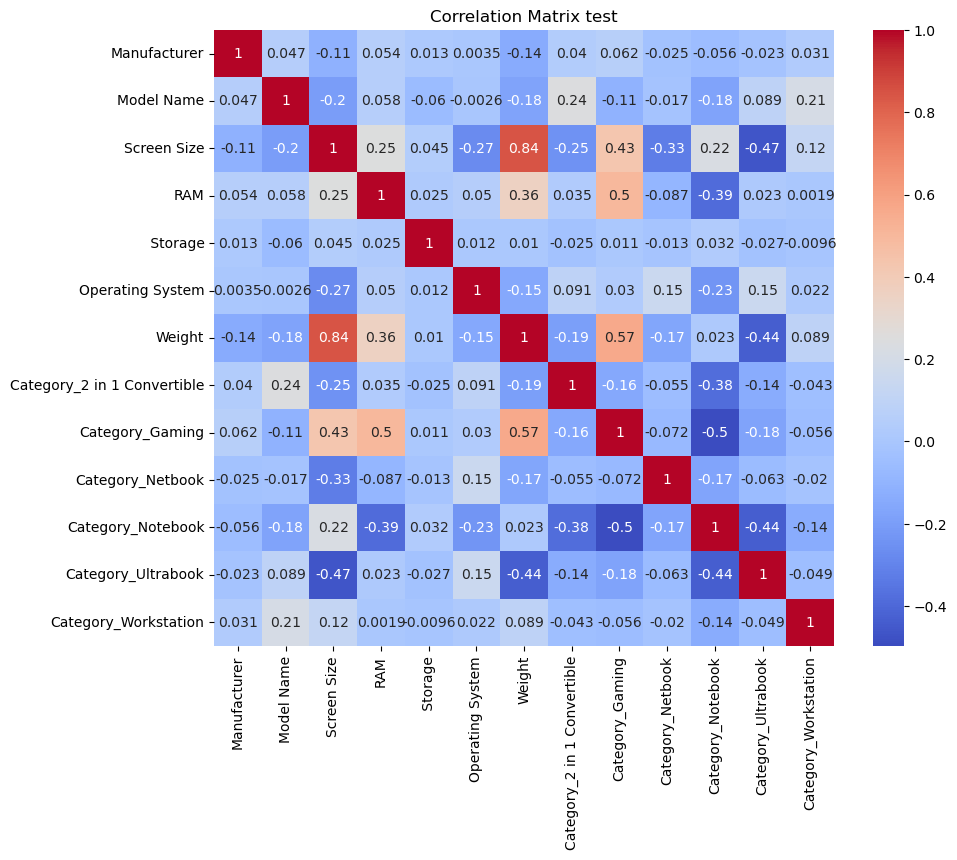

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df_test_encoded.corr()

# Generar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.title('Correlation Matrix test')
plt.show()


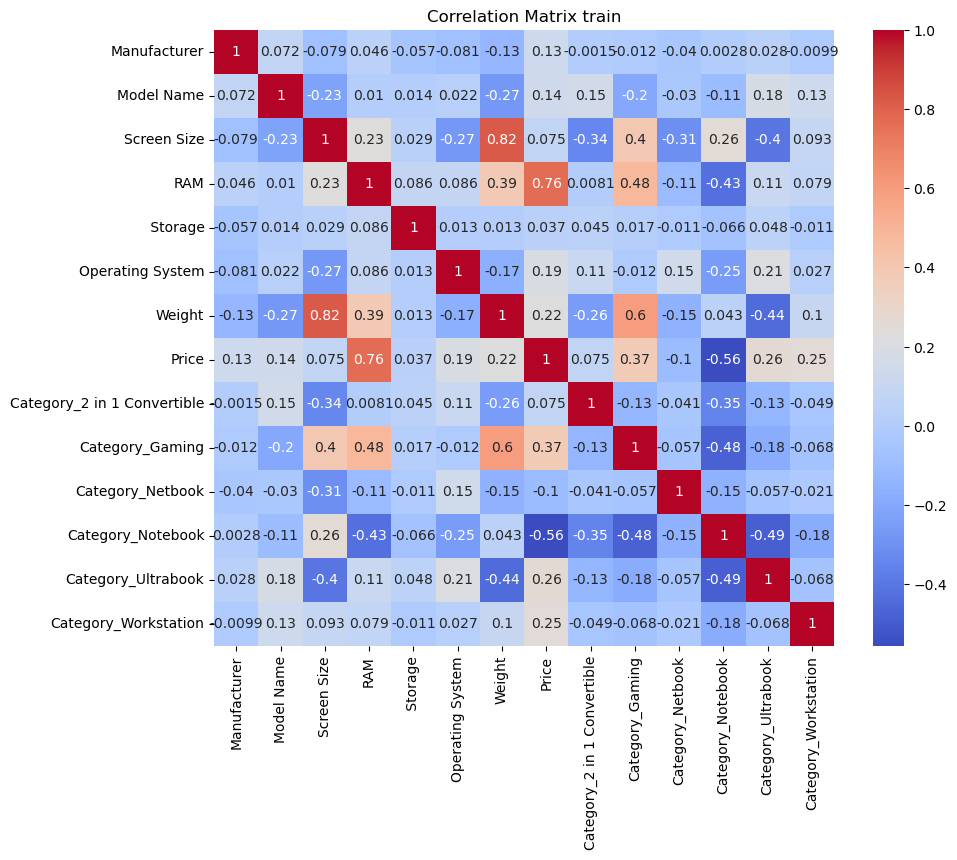

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df_train_encoded.corr()

# Generar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.title('Correlation Matrix train')
plt.show()

In [69]:
df_train_encoded.shape

(977, 14)

In [70]:
df_test_encoded.shape

(325, 13)

In [71]:

from sklearn.ensemble import RandomForestRegressor as RFR

In [72]:
df_train_encoded.to_csv('df_train_encoded.csv')
df_test.to_csv('df_test.csv')

In [73]:

from sklearn.model_selection import train_test_split

# Dividir el dataframe en características (X) y etiquetas (y)
X = df_train_encoded.drop("Price", axis=1)
y = df_train_encoded["Price"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)

# Crear el modelo de Random Forest Regressor
random_forest = RFR()

# Entrenar el modelo
random_forest.fit(X_train, y_train)


# Realizar predicciones en el conjunto de prueba
y_pred = random_forest.predict(X_test)

#y_predict = df_test_incoded

# Calcular el coeficiente de determinación (R2)
r2_score = random_forest.score(X_test, y_test)

print("Coeficiente de determinación (R2):", r2_score)


Coeficiente de determinación (R2): 0.7840102208433102


In [74]:
df_train_encoded.head()

,Manufacturer,Model Name,Screen Size,RAM,Storage,Operating System,Weight,Price,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,1,236,13.3,8,128,3,1.37,11912523.48,0,0,0,0,1,0
1,1,237,13.3,8,128,3,1.34,7993374.48,0,0,0,0,1,0
2,7,38,15.6,8,256,1,1.86,5112900.00,0,0,0,1,0,0
3,1,236,15.4,16,512,3,1.83,22563005.40,0,0,0,0,1,0
4,1,236,13.3,8,256,3,1.37,16037611.20,0,0,0,0,1,0


In [75]:
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Manufacturer                 325 non-null    int32  
 1   Model Name                   325 non-null    int32  
 2   Screen Size                  325 non-null    float64
 3   RAM                          325 non-null    int32  
 4    Storage                     325 non-null    int32  
 5   Operating System             325 non-null    int64  
 6   Weight                       325 non-null    float64
 7   Category_2 in 1 Convertible  325 non-null    uint8  
 8   Category_Gaming              325 non-null    uint8  
 9   Category_Netbook             325 non-null    uint8  
 10  Category_Notebook            325 non-null    uint8  
 11  Category_Ultrabook           325 non-null    uint8  
 12  Category_Workstation         325 non-null    uint8  
dtypes: float64(2), int32

In [76]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 199 to 971
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Manufacturer                 196 non-null    int32  
 1   Model Name                   196 non-null    int32  
 2   Screen Size                  196 non-null    float64
 3   RAM                          196 non-null    int32  
 4    Storage                     196 non-null    int32  
 5   Operating System             196 non-null    int64  
 6   Weight                       196 non-null    float64
 7   Category_2 in 1 Convertible  196 non-null    uint8  
 8   Category_Gaming              196 non-null    uint8  
 9   Category_Netbook             196 non-null    uint8  
 10  Category_Notebook            196 non-null    uint8  
 11  Category_Ultrabook           196 non-null    uint8  
 12  Category_Workstation         196 non-null    uint8  
dtypes: float64(2), int

In [77]:
y_test.shape

(196,)

In [78]:
y_pred.shape

(196,)

In [79]:
from sklearn.metrics import mean_squared_error

# Calcular el MSE
mse = mean_squared_error(y_test,y_pred)

print("Error cuadrático medio (MSE):", mse)


Error cuadrático medio (MSE): 7809156148028.704


In [80]:
random_forest.fit(X, y)
y_predict = df_test_encoded
y_pred = random_forest.predict(y_predict)
y_pred


array([ 4582543.0326    , 14223023.4276    , 10206936.0666    ,
       11590062.51      ,  5656853.8728    ,  5037893.5347    ,
        5002701.97258   ,  4668308.892     ,  5110601.418     ,
       10972003.302     ,  5347494.0792    ,  6999046.7352    ,
       15859435.0824    ,  4372491.9108    ,  4312770.8676    ,
        6237171.876     ,  9650049.70287429,  9593920.0305    ,
       12426983.6262    ,  4173167.27211429, 12868993.2384    ,
       11902914.3402    , 10548354.6324    , 12809877.444     ,
        4238891.6856    ,  5797599.57088   , 11590062.51      ,
        5328065.0592    ,  5498975.82      , 12364429.23612   ,
       10193592.47946   ,  5797599.57088   ,  8700308.0424    ,
       12522373.89      ,  5615658.5706    , 10307880.73302   ,
        6003755.81884   , 10030115.0898    ,  5000728.2351    ,
       11931300.1236    , 10026248.7       , 11531587.59591429,
        5143248.48068571, 12654074.784     , 10536462.1752    ,
       10193592.47946   ,  8128482.492  

In [81]:
Prediccion = pd.DataFrame(y_pred)

In [82]:
Prediccion.head()

,0
0,4.582543e+06
1,1.422302e+07
2,1.020694e+07
3,1.159006e+07
4,5.656854e+06


In [83]:
Prediccion.to_csv('Prediccion.csv')

In [84]:
numbers = [ 4669753.0269    , 14780149.9092    , 10241056.0044    ,
       11446278.4254    ,  5679212.8068    ,  4966447.33728   ,
        4709579.45016   ,  4487223.312     ,  4952802.504     ,
       11073642.1224    ,  5063128.8084    ,  6643200.7512    ,
       15690642.9888    ,  4768215.49152   ,  4350296.3673    ,
        6437353.9152    ,  8915208.47779714,  9665224.3116    ,
       12696819.46215429,  4082375.8872    , 12578343.9912    ,
       11230644.165     , 10619315.0154    , 12580093.344     ,
        4360417.1676    ,  5385992.1414    , 11446278.4254    ,
        5154241.5756    ,  5442177.47981143, 12046770.45      ,
       10166895.92412   ,  5385992.1414    ,  8190549.9858    ,
       12844594.776     ,  5280622.55537143,  9898064.90322   ,
        5428407.78168   ,  9561507.1344    ,  4803679.44665143,
       12051708.35544   ,  9158553.7056    , 11254997.13      ,
        4821318.8712    , 12040637.0448    , 10706885.44268572,
       10166895.92412   ,  7928149.5852    , 11350519.44      ,
        4844297.66652   ,  5334436.81446   , 10297267.55304   ,
        7442726.4132    ,  5722122.98201143,  4067649.41622   ,
       10660386.126     ,  7350858.18168   ,  9842282.7048    ,
       12917767.6368    ,  4601462.77812   , 12217854.012     ,
        7253420.772     , 10166895.92412   ,  4780727.3358    ,
        2486238.768     , 11265288.31584   ,  6037116.696     ,
        5029961.59758857, 10372940.37      , 11254997.13      ,
       18913987.63242857, 18888013.95222856,  3071033.5968    ,
       14375268.51696   ,  5151969.966     ,  8752427.3148    ,
        4803679.44665143, 15166023.5844    ,  4543535.54772   ,
        3452093.06804143,  6071389.1316    ,  8416994.73542572,
       20315824.9398    ,  7045141.974     , 12237928.8876    ,
        4599954.606     , 10249138.8324    , 20404474.623     ,
       10297267.55304   , 29254528.836     ,  7866845.67919714,
       22340766.75480001, 12453513.36126856,  4339081.7028    ,
        4543535.54772   , 12917767.6368    , 10498364.19372   ,
       11215141.1112    ,  5334428.1744    ,  4438198.07028   ,
       18913987.63242857,  4632429.3015    ,  4381718.93172   ,
       14633713.7856    , 27781878.59616001,  2906357.3136    ,
       16953042.6       ,  7163494.79463428,  5029961.59758857,
       16010178.5649    ,  6544517.6316    ,  3017750.9544    ,
        4137524.0712    ,  2981643.0618    ,  2790710.4069    ,
       11244094.9452    ,  8699663.076     ,  5433692.4603    ,
        8864417.016     ,  5063128.8084    ,  8933599.5918    ,
        4461559.94778   , 21922149.30582854,  9834845.436     ,
        8514264.876     ,  3135653.9838    , 12778878.1536    ,
       12188875.2804    , 10967434.79988   , 10547030.91      ,
        5007655.1772    ,  4408128.0087    , 12231389.7108    ,
       12153701.4924    ,  4028849.604     ,  4875881.3688    ,
       14216472.9876    ,  2906357.3136    , 10725166.59864   ,
       18854897.80266857, 13296176.1816    , 17376074.1648    ,
       12281152.8996    ,  2566888.3188    , 10442528.65388571,
       11254997.13      ,  2950404.5766    ,  3787070.28492   ,
        8637828.87864   ,  2906357.3136    , 12917767.6368    ,
       10112254.4952    , 11531418.8808    ,  4795987.0452    ,
       10193962.1199    ,  2569432.32      ,  7675792.5504    ,
        4026694.56852   , 11526649.8048    , 13710820.02653999,
        5442837.0672    , 18913987.63242857,  6757604.4822    ,
       14025279.44777143, 10777768.5288    , 10252191.40518857,
       12462652.87644   , 10252191.40518857, 15519163.12518   ,
       12917767.6368    ,  7163494.79463428,  5839771.2048    ,
       16050108.8072    ,  3016780.0962    ,  4350476.63354572,
        4417369.5384    ,  8001927.5466    ,  7248730.15731428,
        4344968.2068    , 18982855.68972   , 13378974.9288    ,
        4789557.5364    , 11379712.29942857,  9158632.63692   ,
       20644335.4338    ,  7984544.2794    ,  4983888.0468    ,
        3544390.67201143, 11168217.7308    ,  6649765.122     ,
        4402537.05996   ,  2235527.0496    ,  7820713.6254    ,
        6059017.692     , 11998094.901     ,  4172019.696     ,
        3796444.74578572,  4363823.6928    ,  4858726.94357143,
        4393593.13068   , 15736594.77      , 19849968.6138    ,
        4376673.01812   , 16046816.396     ,  7768157.163     ,
        6985715.5524    ,  4908457.15152   ,  4486734.87514571,
       10764108.34200001, 13040431.443     ,  5101200.4992    ,
       10686459.72264   , 18197156.9988    ,  7820992.8342    ,
        4368514.2228    ,  4705780.03617429, 12453513.36126856,
        8251355.44862571,  7869580.056     ,  3016780.0962    ,
       19140082.1664    ,  3192941.64651429, 18592656.94572   ,
        4894338.1968    ,  7281510.7482    , 13295821.2426    ,
       15788639.646     ,  7469280.        ,  8004167.2932    ,
        5962370.2476    ,  4429263.56652   ,  9114134.6088    ,
       12605524.1676    , 12723592.01657143, 17493341.50511999,
       18592656.94572   ,  8357529.4452    , 13854869.73      ,
        2794590.2088    ,  5047006.1304    ,  4656229.11      ,
       10947980.082     , 12590450.54941143,  6138833.1732    ,
       10754996.5614    ,  4591292.6865    , 10874322.19224   ,
        4959103.968     ,  4081725.4374    , 10297267.55304   ,
        4035285.10431429, 12585747.4704    , 10761576.6414    ,
       15133182.7608    , 19688469.8868    ,  4920807.9024    ,
       20115087.38772   , 11321250.99857143,  4319551.2399    ,
        9898064.90322   ,  4028849.604     , 10747811.8254    ,
       13258650.63744   ,  5679212.8068    ,  9936226.95156   ,
        3638868.75634286, 13542101.04      ,  5072286.6792    ,
       12580021.0224    ,  5348495.34804   , 12028072.3524    ,
        6299202.468     , 12054106.67604   ,  2981643.0618    ,
        4715472.31617429,  5521273.992     ,  6656368.3953    ,
        4441642.92      ,  3787070.28492   , 17302440.402     ,
        4395964.716     ,  4689484.3008    , 10695579.7728    ,
        5028992.124     , 13590169.87937143,  4663222.668     ,
        3638868.75634286,  4339829.52      ,  4877185.5288    ,
        4442681.8761    ,  4771999.986     ,  2309012.316     ,
        4172019.696     ,  4929223.884     , 14626620.28152   ,
        2707027.128     ,  4606298.63374571,  4172019.696     ,
       13590169.87937143,  4663222.668     ,  3638868.75634286,
        4339829.52      ,  4877185.5288    ,  4442681.8761    ,
        4771999.986     ,  2309012.316     ,  4172019.696     ,
        4929223.884     , 14626620.28152   ,  2707027.128     ,
        4606298.63374571,  4172019.696     , 13590169.87937143,
        4663222.668     ,  3638868.75634286,  4339829.52      ,
        4877185.5288    ,  4442681.8761    ,  4771999.986     ,
        2309012.316     ,  4172019.696     ,  4929223.884     ,
       14626620.28152   ,  2707027.128     ,  4606298.63374571,
        4172019.696 ]



rounded_numbers = [round(num, 2) for num in numbers]
rounded_numbers


[4669753.03,
 14780149.91,
 10241056.0,
 11446278.43,
 5679212.81,
 4966447.34,
 4709579.45,
 4487223.31,
 4952802.5,
 11073642.12,
 5063128.81,
 6643200.75,
 15690642.99,
 4768215.49,
 4350296.37,
 6437353.92,
 8915208.48,
 9665224.31,
 12696819.46,
 4082375.89,
 12578343.99,
 11230644.16,
 10619315.02,
 12580093.34,
 4360417.17,
 5385992.14,
 11446278.43,
 5154241.58,
 5442177.48,
 12046770.45,
 10166895.92,
 5385992.14,
 8190549.99,
 12844594.78,
 5280622.56,
 9898064.9,
 5428407.78,
 9561507.13,
 4803679.45,
 12051708.36,
 9158553.71,
 11254997.13,
 4821318.87,
 12040637.04,
 10706885.44,
 10166895.92,
 7928149.59,
 11350519.44,
 4844297.67,
 5334436.81,
 10297267.55,
 7442726.41,
 5722122.98,
 4067649.42,
 10660386.13,
 7350858.18,
 9842282.7,
 12917767.64,
 4601462.78,
 12217854.01,
 7253420.77,
 10166895.92,
 4780727.34,
 2486238.77,
 11265288.32,
 6037116.7,
 5029961.6,
 10372940.37,
 11254997.13,
 18913987.63,
 18888013.95,
 3071033.6,
 14375268.52,
 5151969.97,
 8752427.31,
 

In [89]:
Prediccion1 = pd.DataFrame(rounded_numbers)
#Prediccion1

In [91]:
df_muestra['Price']=Prediccion1

In [92]:
Prediccion1.head()

,0
0,4669753.03
1,14780149.91
2,10241056.00
3,11446278.43
4,5679212.81


In [93]:
df_muestra.head()

,id,Price
0,0,4669753.03
1,1,14780149.91
2,2,10241056.00
3,3,11446278.43
4,4,5679212.81


In [94]:
df_muestra.to_csv('../data/muestra1.csv', index=False)